In [126]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [134]:
df=pd.read_csv("titanic_train.csv")
dft=pd.read_csv("titanic_test.csv") 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
Xint=df.select_dtypes(include=['integer','float'])
Xint.drop(columns=['PassengerId','Survived'],inplace=True)

In [20]:
Xint.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Fare', ylabel='Count'>

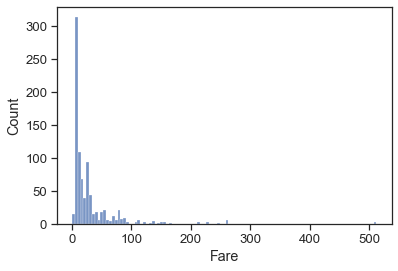

In [21]:
sns.histplot(data=Xint,x='Fare')

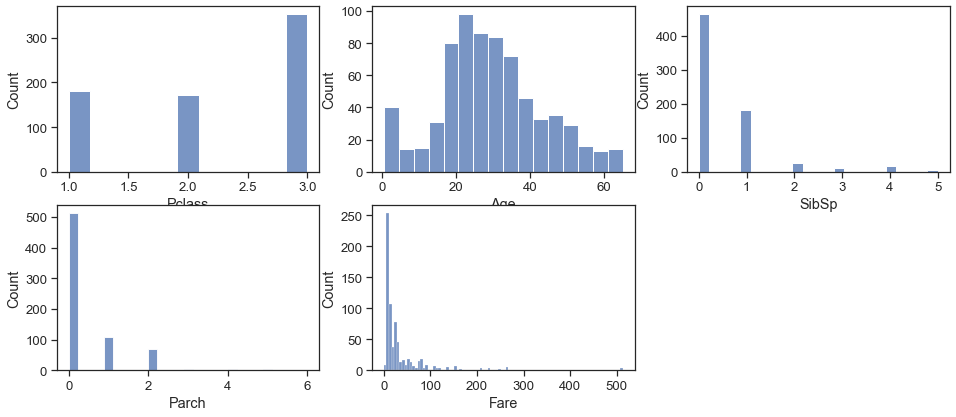

In [86]:

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(Xint.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(data=Xint, x=feature)

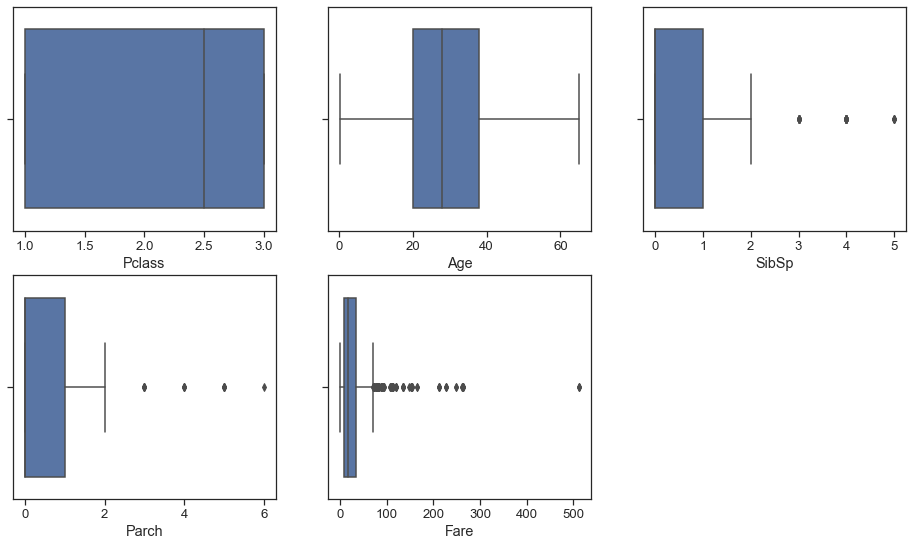

In [87]:

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')
for i, feature in enumerate(Xint.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=Xint, x=feature)

In [83]:
Xint=df.select_dtypes(include=['integer','float'])
Xint=Xint.drop(columns=['PassengerId','Survived'])

In [84]:
filt=Xint['Age'] < Xint['Age'].quantile(.99)
Xint=Xint.loc[filt]

<AxesSubplot:xlabel='Age'>

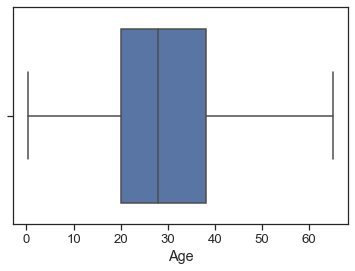

In [85]:
sns.boxplot(x=Xint['Age'])

<AxesSubplot:xlabel='Fare'>

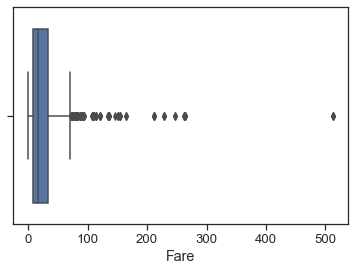

In [88]:
sns.boxplot(x=Xint['Fare'])

In [169]:
Xint=df.select_dtypes(include=['integer','float'])
Xint=Xint.drop(columns=['PassengerId','Survived'])

In [171]:
df['Fare_log'] = np.log(df['Fare'])

In [172]:
filt=df['Fare_log'] < df['Fare_log'].quantile(.017)

In [173]:
df['Fare_log'].loc[filt]=1.389

C:\Users\kiran\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [175]:
filt=df['Fare_log'] < df['Fare_log'].quantile(.017)
df['Fare_log'].loc[filt]

179    1.389
263    1.389
271    1.389
277    1.389
302    1.389
378    1.389
413    1.389
466    1.389
481    1.389
597    1.389
633    1.389
674    1.389
732    1.389
806    1.389
815    1.389
822    1.389
Name: Fare_log, dtype: float64

<AxesSubplot:xlabel='Fare_log'>

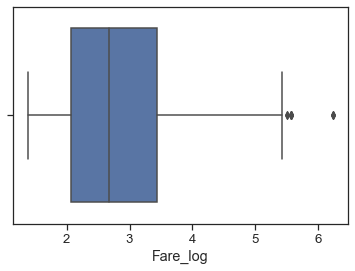

In [176]:
sns.boxplot( data=df, x='Fare_log')

In [179]:
df['Fare_sq'] = np.sqrt(df['Fare'])

<AxesSubplot:xlabel='Fare_sq'>

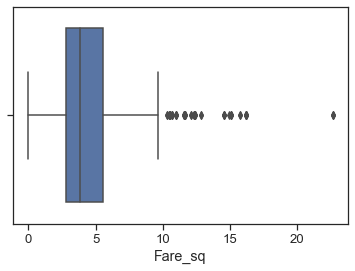

In [180]:
sns.boxplot(x=df['Fare_sq'])

<AxesSubplot:xlabel='Fare'>

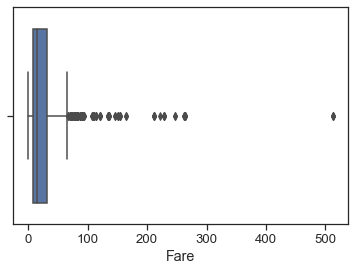

In [181]:
sns.boxplot(x=df['Fare'])

In [119]:
filt=Xint['Fare'] < Xint['Fare'].quantile(.81)
Xint=Xint.loc[filt]

<AxesSubplot:xlabel='Fare'>

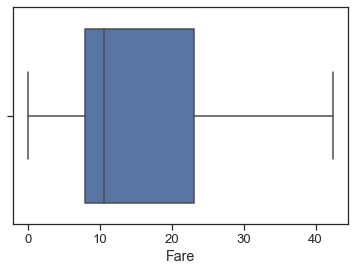

In [120]:
sns.boxplot(x=Xint['Fare'])

In [122]:
Xint=df.select_dtypes(include=['integer','float'])
Xint=Xint.drop(columns=['PassengerId','Survived'])

<AxesSubplot:xlabel='Parch'>

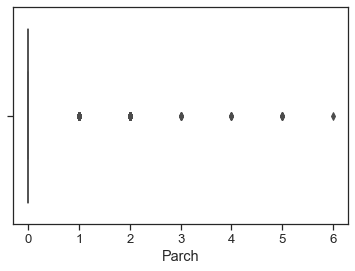

In [123]:
sns.boxplot(x=Xint['Parch'])

In [7]:
dft.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.shape,dft.shape

((891, 12), (418, 11))

<AxesSubplot:>

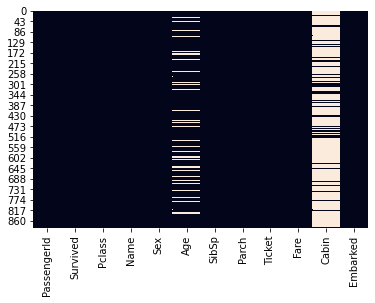

In [10]:
sns.heatmap(df.isnull(),cbar=False)

<AxesSubplot:>

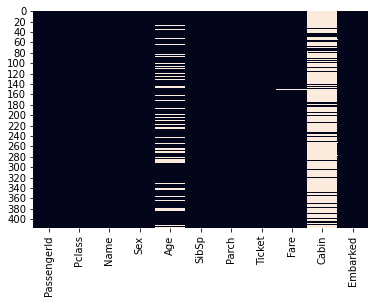

In [11]:
sns.heatmap(dft.isnull(),cbar=False)

In [16]:
df['Age'].isnull().sum()

177

In [18]:
for col in df.columns:
    print(col,df[col].isnull().sum())

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [19]:
for col in dft.columns:
    print(col,dft[col].isnull().sum())

PassengerId 0
Pclass 0
Name 0
Sex 0
Age 86
SibSp 0
Parch 0
Ticket 0
Fare 1
Cabin 327
Embarked 0


### Handling Null Values in Train Data

##### Embarked

In [22]:
filt=df['Embarked'].isnull()
df.loc[filt]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:xlabel='Embarked', ylabel='count'>

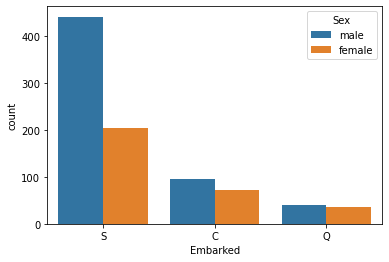

In [29]:
sns.countplot(x=df['Embarked'],hue=df['Sex'])

In [33]:
df['Embarked'].fillna('S',inplace=True)

In [34]:
filt=df['Embarked'].isnull()
df.loc[filt]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [35]:
filt1=df['Age'].isnull()
df.loc[filt1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [37]:
df['Age'].median()

28.0

###### First method

In [38]:
df['Age'].fillna(df['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

###### Second Method

<AxesSubplot:xlabel='Sex', ylabel='Age'>

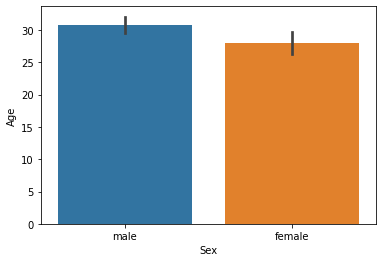

In [46]:
sns.barplot(y=df['Age'],x='Sex',data=df)

In [52]:
dfmale=df['Sex']=='male'
df['Age'].loc[dfmale].mean()

30.72664459161148

In [53]:
dffemale=df['Sex']=='female'
df['Age'].loc[dffemale].mean()

27.915708812260537

In [56]:
dfmale1=(df['Sex']=='male') &  (df['Age'].isnull())

df.loc[dfmale1,'Age']=30.72664459161148


In [57]:
dffemale1=(df['Sex']=='female') &  (df['Age'].isnull())

df.loc[dffemale1,'Age']=27.915708812260537

In [58]:
df['Age'].isnull().sum()

0

<AxesSubplot:>

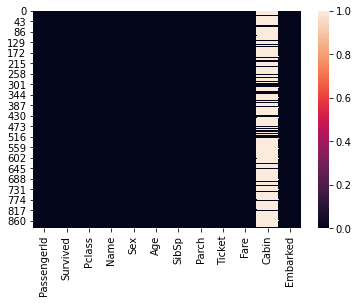

In [59]:
sns.heatmap(df.isnull())

In [60]:
for col in df.columns:
    print(col,df[col].isnull().sum())

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 0
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 0


### Handluing Null in Test data

In [73]:
for col in dft.columns:
    print(col,dft[col].isnull().sum())

PassengerId 0
Pclass 0
Name 0
Sex 0
Age 86
SibSp 0
Parch 0
Ticket 0
Fare 1
Cabin 327
Embarked 0


##### Fare

In [81]:
filt2=dft['Fare'].isnull()

dft.loc[filt2]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [82]:
dft['Fare'].mean()

35.6271884892086

In [83]:
g=df.groupby(['Embarked'])

g['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.243651
Name: Fare, dtype: float64

In [84]:
dft.loc[filt2,'Fare']=27.243651

In [85]:
filt2=dft['Fare'].isnull()
dft.loc[filt2]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


###### Age

In [74]:
dfmale=dft['Sex']=='male'
dft['Age'].loc[dfmale].mean()

30.27273170731707

In [77]:
dffemale=dft['Sex']=='female'
dft['Age'].loc[dffemale].mean()

30.27236220472441

In [78]:
dfmale1=(dft['Sex']=='male') &  (dft['Age'].isnull())

dft.loc[dfmale1,'Age']=30.27


In [79]:
dffemale1=(dft['Sex']=='female') &  (dft['Age'].isnull())

dft.loc[dffemale1,'Age']=30.27

In [86]:
for col in dft.columns:
    print(col,dft[col].isnull().sum())

PassengerId 0
Pclass 0
Name 0
Sex 0
Age 0
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 327
Embarked 0


<AxesSubplot:>

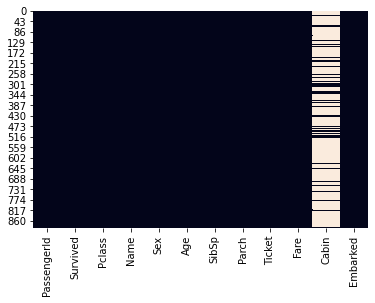

In [87]:
sns.heatmap(df.isnull(),cbar=False)

<AxesSubplot:>

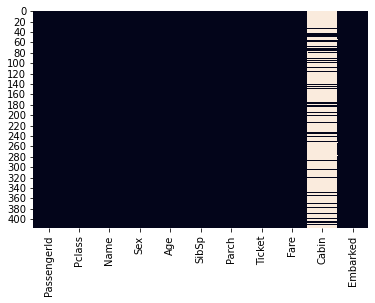

In [88]:
sns.heatmap(dft.isnull(),cbar=False)

##### Generating feature and Target

In [89]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [98]:
X=df[[ 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

In [99]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,27.915709,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [94]:
y=df['Survived']

In [95]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [97]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    object 
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


##### One hot encoding to convert objet into int /float ,

##### Embaked

In [103]:
X['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [104]:
temp_emb=pd.get_dummies(X['Embarked'],drop_first=True) #to convert Embarked col into one hot encode,,
#but it will create a seperate dataframe

In [105]:
temp_emb

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [107]:
X=pd.concat([X,temp_emb],axis=1) #adding one hot encoded to X dataframe

In [108]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S
0,3,male,22.000000,1,0,7.2500,S,0,1
1,1,female,38.000000,1,0,71.2833,C,0,0
2,3,female,26.000000,0,0,7.9250,S,0,1
3,1,female,35.000000,1,0,53.1000,S,0,1
4,3,male,35.000000,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,0,1
887,1,female,19.000000,0,0,30.0000,S,0,1
888,3,female,27.915709,1,2,23.4500,S,0,1
889,1,male,26.000000,0,0,30.0000,C,0,0


In [110]:
X.drop(columns=('Embarked'),inplace=True)

In [112]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,male,22.000000,1,0,7.2500,0,1
1,1,female,38.000000,1,0,71.2833,0,0
2,3,female,26.000000,0,0,7.9250,0,1
3,1,female,35.000000,1,0,53.1000,0,1
4,3,male,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,0,1
887,1,female,19.000000,0,0,30.0000,0,1
888,3,female,27.915709,1,2,23.4500,0,1
889,1,male,26.000000,0,0,30.0000,0,0


#### Gender to one hot encode

In [114]:
temp_Gender=pd.get_dummies(X['Sex'],drop_first=True)
X=pd.concat([X,temp_Gender],axis=1)

X.drop(columns=('Sex'),inplace=True)

In [115]:
X

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,22.000000,1,0,7.2500,0,1,1
1,1,38.000000,1,0,71.2833,0,0,0
2,3,26.000000,0,0,7.9250,0,1,0
3,1,35.000000,1,0,53.1000,0,1,0
4,3,35.000000,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,1
887,1,19.000000,0,0,30.0000,0,1,0
888,3,27.915709,1,2,23.4500,0,1,0
889,1,26.000000,0,0,30.0000,0,0,1


##### Test Train Split

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=15)

In [120]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=9,weights='uniform',p=2,metric='minkowski',algorithm='auto')

In [121]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [122]:
neigh.score(X_test,y_test)

0.6547085201793722

In [123]:
neigh.score(X_train,y_train)

0.7784431137724551

## Prediction 

In [131]:
dft.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [138]:
Xt=dft[[ 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

In [139]:
Xt

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50,0,0,7.8292,Q
1,3,female,47.00,1,0,7.0000,S
2,2,male,62.00,0,0,9.6875,Q
3,3,male,27.00,0,0,8.6625,S
4,3,female,22.00,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27,0,0,8.0500,S
414,1,female,39.00,0,0,108.9000,C
415,3,male,38.50,0,0,7.2500,S
416,3,male,30.27,0,0,8.0500,S


In [140]:
temp_Gender_t=pd.get_dummies(Xt['Sex'],drop_first=True)
Xt=pd.concat([Xt,temp_Gender_t],axis=1)

Xt.drop(columns=('Sex'),inplace=True)

In [141]:
temp_Emb_t=pd.get_dummies(Xt['Embarked'],drop_first=True)
Xt=pd.concat([Xt,temp_Emb_t],axis=1)

Xt.drop(columns=('Embarked'),inplace=True)

In [142]:
Xt

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.50,0,0,7.8292,1,1,0
1,3,47.00,1,0,7.0000,0,0,1
2,2,62.00,0,0,9.6875,1,1,0
3,3,27.00,0,0,8.6625,1,0,1
4,3,22.00,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,30.27,0,0,8.0500,1,0,1
414,1,39.00,0,0,108.9000,0,0,0
415,3,38.50,0,0,7.2500,1,0,1
416,3,30.27,0,0,8.0500,1,0,1


###### Giving Xt to predict

In [143]:
neigh.predict(Xt)

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,

##### Uploading to Kaggle

In [144]:
titanic_prediction=neigh.predict(Xt)

In [151]:
submission=pd.DataFrame({"PassengerId" : dft['PassengerId'],"Survived" :titanic_prediction})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [152]:
submission.to_csv("titanic_knn.csv",index=False)